In [51]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [52]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [53]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [54]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [55]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [56]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)

# Print all of the classes mapped to the Base
Base.classes.keys()
# reflect the tables
station = Base.classes.station
measurement = Base.classes.measurement

In [57]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [58]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [59]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

<function matplotlib.pyplot.show(close=None, block=None)>

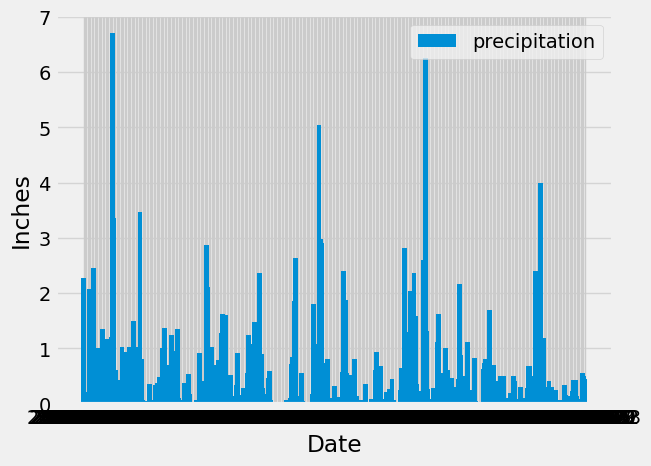

In [41]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
last_12_months_data = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date > query_date).\
    order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(last_12_months_data)
df = df.rename(columns={"prcp":"precipitation"})

# Sort the dataframe by date
df = df.sort_values(by="date")

# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(df.date, df.precipitation, width=3.5, label='precipitation')
plt.xlabel('Date')
plt.ylabel('Inches')   
plt.legend()
plt.show

In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.station)).all()

[(9,)]

In [20]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(station.station,func.count(measurement.station).label('observation_count')).\
                        join(measurement, station.station == measurement.station).\
                        group_by(station.station).\
                        order_by(func.count( measurement.id).desc()).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').first()


(54.0, 85.0, 71.66378066378067)

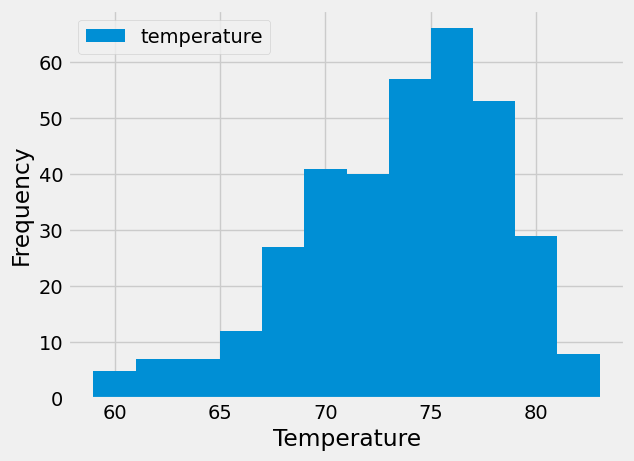

datetime.date(2016, 8, 23)

In [48]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# finding query date
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# gathering temp data from when the station is USC00519281 and after the query date
temperature_data = session.query(measurement.tobs)\
    .filter(measurement.station == active_stations[0][0])\
    .filter(measurement.date >= query_date)\
    .all()

# Convert query results to Pandas DataFrame
df = pd.DataFrame(temperature_data, columns=['temperature'])

# Plot the temperature observations as a histogram
plt.hist(df['temperature'], bins=12, label="temperature")
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()
plt.show()
query_date

# Close Session

In [16]:
# Close Session
session.close()